In [536]:
# Data Manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for data visualization

In [537]:
df = pd.read_csv('merged-population-asia.csv')

In [538]:
df = df[df['Country Name'] == 'China']
df = df.drop(['Unnamed: 0'], axis=1)
#df.drop(df[df['Year'] <= 1998].index, inplace = True)
df.head

<bound method NDFrame.head of    Country Name  Year  Hydropower (terawatt-hours)  Solar (terawatt-hours)  \
0         China  1990                   126.743973                0.002000   
1         China  1991                   124.688952                0.002000   
2         China  1992                   130.686077                0.003000   
3         China  1993                   151.846165                0.004000   
4         China  1994                   167.428969                0.005000   
5         China  1995                   190.580000                0.007000   
6         China  1996                   187.970000                0.009000   
7         China  1997                   195.980000                0.011000   
8         China  1998                   198.890000                0.014000   
9         China  1999                   196.580000                0.017000   
10        China  2000                   222.410000                0.022000   
11        China  2001             

In [539]:
# Finding the correlation between consumption and population

from scipy.stats import pearsonr

corr, _ = pearsonr(df['Hydropower (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Hydropower: %.3f' % corr)

corr, _ = pearsonr(df['Solar (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Solar Power: %.3f' % corr)

corr, _ = pearsonr(df['Wind (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Wind: %.3f' % corr)

corr, _ = pearsonr(df['Other renewables (terawatt-hours)'], df['Population'])
print('Pearsons correlation for other renewables: %.3f' % corr)

# With the high correlation for Hydropower and population (0.884) in China, we can
# support our claim that an increase in population leads to an increase in need 
# for hydropower.



Pearsons correlation for Hydropower: 0.884
Pearsons correlation for Solar Power: 0.503
Pearsons correlation for Wind: 0.687
Pearsons correlation for other renewables: 0.771


# Hydropower

In [466]:
# Use MinMax Scaling on Year and Hydropower
scaler=MinMaxScaler()
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Hydropower (scaled)']=scaler.fit_transform(df[['Hydropower (terawatt-hours)']])

In [468]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Hydropower (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Hydropower Energy Consumption in China", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()



In [469]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Hydropower (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='linear', C=400, epsilon=165) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)




# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [470]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Hydropower (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+165, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-165, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Hydropower Energy Consumption in China (epsilon=180, C=200)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [471]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([308.39498554, 963.18023215, 770.59633611, 423.94532321,
       154.32786868, 385.42854403, 924.66345297, 809.11311529,
       192.84464787])

In [472]:
#Accuracy for SVR
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)


print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print('Mean Absolute Error is: ', meanAbErr)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 88.45
Mean Absolute Error is:  101.45435418481912
Mean Squared Error is:  13985.290207788397
Root Mean Squared Error is:  118.25941910811332


In [473]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,308.394986,196.58000
1,963.180232,1153.26950
2,770.596336,688.04500
3,423.945323,287.97000
4,154.327869,190.58000
5,385.428544,277.43000
6,924.663453,1114.51541
7,809.113115,862.79411
8,192.844648,187.97000


In [474]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([305.25862871, 927.91089593, 744.77787616, 415.13844057,
       158.7522129 , 378.51183662, 891.28429197, 781.40448011,
       195.37881685])

In [475]:
#Accuracy for Linear Regression
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)


print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print('Mean Absolute Error is: ', meanAbErr)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 87.92
Mean Absolute Error is:  106.98641533442948
Mean Squared Error is:  16636.64627640129
Root Mean Squared Error is:  128.98312399845682


In [476]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,305.258629,196.58000
1,927.910896,1153.26950
2,744.777876,688.04500
3,415.138441,287.97000
4,158.752213,190.58000
5,378.511837,277.43000
6,891.284292,1114.51541
7,781.404480,862.79411
8,195.378817,187.97000


In [477]:
# ------- Support Vector regression using entire dataset as training set -------
model2 = SVR(kernel='linear', C=400, epsilon=165) # set kernel and hyperparameters
svr = model2.fit(X, y)


In [478]:
#predicting y values for future years using updated SVR model
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([1068.04798245, 1107.55883992, 1147.06969738, 1186.58055496,
       1226.09141243, 1265.60226989, 1305.11312747, 1344.62398493,
       1384.13484252, 1423.64569986, 1463.15655732, 1502.6674149 ,
       1542.17827237, 1581.68912983, 1621.19998741, 1660.71084487,
       1700.22170246, 1739.73255992, 1779.24341726, 1818.75427485,
       1858.26513231, 1897.77598977, 1937.28684735, 1976.79770482,
       2016.3085624 , 2055.81941986, 2095.33027732, 2134.84113491,
       2174.35199225, 2213.86284971, 2253.37370729, 2292.88456476,
       2332.39542234])

In [479]:
net_consumption=y_pred
net_consumption

array([1068.04798245, 1107.55883992, 1147.06969738, 1186.58055496,
       1226.09141243, 1265.60226989, 1305.11312747, 1344.62398493,
       1384.13484252, 1423.64569986, 1463.15655732, 1502.6674149 ,
       1542.17827237, 1581.68912983, 1621.19998741, 1660.71084487,
       1700.22170246, 1739.73255992, 1779.24341726, 1818.75427485,
       1858.26513231, 1897.77598977, 1937.28684735, 1976.79770482,
       2016.3085624 , 2055.81941986, 2095.33027732, 2134.84113491,
       2174.35199225, 2213.86284971, 2253.37370729, 2292.88456476,
       2332.39542234])

In [480]:
# Finding the Rate of Increase for Hydropower Consumption
print ("Rate of Increase:", (y_pred[2] - 711.38314)/10)

Rate of Increase: 43.5686557380095


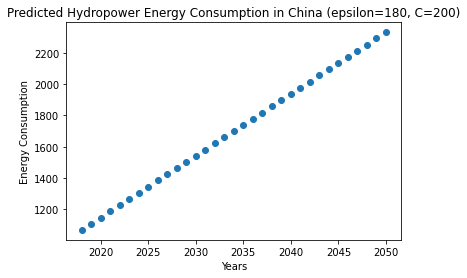

In [481]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Hydropower Energy Consumption in China (epsilon=180, C=200)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Solar

In [395]:
# Use MinMax Scaling on Year and Solar
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Solar (terawatt-hours)']])

In [482]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Solar (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Solar Energy Consumption in China", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()



In [483]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Solar (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=100, epsilon=15) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [484]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Solar (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+15, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-15, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Solar Energy Consumption in China (epsilon=200, C=200)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [485]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([14.84538145, 54.41965314,  7.32910693, 11.7386314 , 14.41871673,
       13.2880178 , 44.22510145, 14.42554115, 14.69148384])

In [486]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 64.51
Mean Squared Error is:  127.59961732537909
Root Mean Squared Error is:  11.296000058665859


In [487]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,14.845381,0.01700
1,54.419653,61.68600
2,7.329107,2.61000
3,11.738631,0.04800
4,14.418717,0.00700
5,13.288018,0.03100
6,44.225101,43.56000
7,14.425541,3.59451
8,14.691484,0.00900


In [488]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 1.88156792, 29.94717213, 21.69258266,  6.83432161, -4.72210366,
        5.18340371, 28.29625424, 23.34350055, -3.07118576])

In [489]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 32.31
Mean Squared Error is:  233.6036362383153
Root Mean Squared Error is:  15.284097495053977


In [490]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.881568,0.01700
1,29.947172,61.68600
2,21.692583,2.61000
3,6.834322,0.04800
4,-4.722104,0.00700
5,5.183404,0.03100
6,28.296254,43.56000
7,23.343501,3.59451
8,-3.071186,0.00900


In [491]:
model2 = SVR(kernel='rbf', C=100, epsilon=15)
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([70.12604548, 74.45343507, 76.12284207, 75.27754973, 72.30866605,
       67.77015483, 62.28108051, 56.43483496, 50.73021443, 45.53185312,
       41.06002577, 37.40407944, 34.55071852, 32.41805465, 30.88803939,
       29.83260775, 29.13162342, 28.68288748, 28.40578015, 28.24059084,
       28.14547729, 28.09255508, 28.06408789, 28.04927935, 28.04182741,
       28.03819892, 28.03648899, 28.03570896, 28.03536445, 28.03521712,
       28.0351561 , 28.03513162, 28.03512211])

In [492]:
net_consumption+=y_pred
net_consumption

array([1138.17402794, 1182.01227499, 1223.19253945, 1261.85810469,
       1298.40007848, 1333.37242472, 1367.39420798, 1401.05881989,
       1434.86505694, 1469.17755298, 1504.21658309, 1540.07149434,
       1576.72899089, 1614.10718448, 1652.08802681, 1690.54345263,
       1729.35332588, 1768.4154474 , 1807.64919741, 1846.99486568,
       1886.4106096 , 1925.86854485, 1965.35093524, 2004.84698416,
       2044.35038981, 2083.85761878, 2123.36676631, 2162.87684387,
       2202.3873567 , 2241.89806683, 2281.40886339, 2320.91969638,
       2360.43054445])

In [493]:
# Finding the Rate of Increase for Solar power Consumption
print ("Rate of Increase:", (y_pred[2] - 0.701)/10)

Rate of Increase: 7.542184206946592


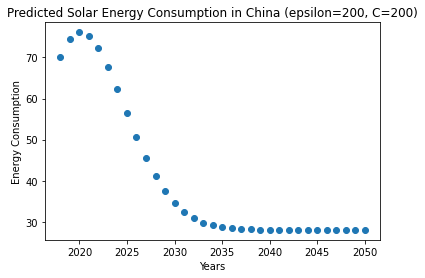

In [494]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Solar Energy Consumption in China (epsilon=200, C=200)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Wind

In [495]:
# Use MinMax Scaling on Year and Solar
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Wind (terawatt-hours)']])

In [496]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Wind (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Wind Energy Consumption in China", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [497]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Wind (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=400, epsilon=25) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [498]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Wind (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+25, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-25, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Wind Energy Consumption in China (epsilon=200, C=500)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [499]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([ 25.27875426, 244.84801682,  88.75824138,  25.24892063,
        21.58931202,  25.5643993 , 214.38063077, 116.16679322,
        22.66864111])

In [500]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 92.14
Mean Squared Error is:  489.3796323138799
Root Mean Squared Error is:  22.12192650548048


In [501]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,25.278754,0.473737
1,244.848017,237.071000
2,88.758241,70.331000
3,25.248921,0.837374
4,21.589312,0.616162
5,25.564399,0.719192
6,214.380631,185.766000
7,116.166793,95.978000
8,22.668641,0.093939


In [502]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 12.55996796, 122.87815203,  90.43162731,  32.02788279,
       -13.39725183,  25.53857785, 116.38884709,  96.92093225,
        -6.90794688])

In [503]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 57.25
Mean Squared Error is:  2248.71656917181
Root Mean Squared Error is:  47.420634423970014


In [504]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,12.559968,0.473737
1,122.878152,237.071000
2,90.431627,70.331000
3,32.027883,0.837374
4,-13.397252,0.616162
5,25.538578,0.719192
6,116.388847,185.766000
7,96.920932,95.978000
8,-6.907947,0.093939


In [505]:
model2 = SVR(kernel='rbf', C=400, epsilon=25) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([273.882502  , 280.81932867, 279.92922312, 271.90320681,
       258.05694282, 240.10358059, 219.89292434, 199.16738039,
       179.37464856, 161.55914587, 146.33444929, 133.92283873,
       124.23852963, 116.98909615, 111.77346526, 108.16210865,
       105.75297345, 104.20325342, 103.24130569, 102.66479421,
       102.33103457, 102.14430731, 102.04331636, 101.99049742,
       101.96377697, 101.95069887, 101.94450473, 101.94166531,
       101.94040534, 101.93986404, 101.93963887, 101.93954816,
       101.93951277])

In [506]:
net_consumption+=y_pred
net_consumption

array([1412.05652993, 1462.83160366, 1503.12176257, 1533.7613115 ,
       1556.4570213 , 1573.47600531, 1587.28713232, 1600.22620029,
       1614.2397055 , 1630.73669885, 1650.55103239, 1673.99433307,
       1700.96752051, 1731.09628064, 1763.86149206, 1798.70556127,
       1835.10629933, 1872.61870082, 1910.89050311, 1949.65965989,
       1988.74164417, 2028.01285217, 2067.3942516 , 2106.83748158,
       2146.31416678, 2185.80831765, 2225.31127104, 2264.81850917,
       2304.32776204, 2343.83793087, 2383.34850226, 2422.85924454,
       2462.37005722])

In [507]:
# Finding the Rate of Increase for Wind power Consumption
print ("Rate of Increase:", (y_pred[2] - 44.622)/10)

Rate of Increase: 23.530722311562243


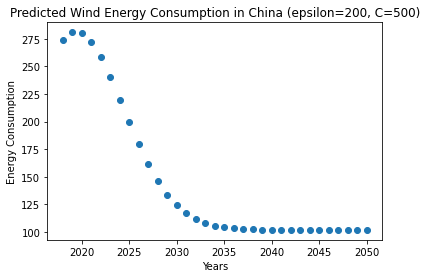

In [508]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Wind Energy Consumption in China (epsilon=200, C=500)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Other Renewables

In [509]:
# Use MinMax Scaling on Year and Other
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Other renewables (terawatt-hours)']])

In [510]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Other renewables (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Wind Energy Consumption in China", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [511]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Other renewables (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=400, epsilon=12) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [512]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Other renewables (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+12, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-12, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Other Energy Consumption in China (epsilon=15, C=400)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [513]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([14.47617918, 64.66862792, 37.11341983, 14.07992262, 13.07336908,
       14.21443517, 60.43363141, 43.13793014, 13.66087044])

In [514]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 75.46
Mean Squared Error is:  106.19081669403211
Root Mean Squared Error is:  10.304892852137382


In [515]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,14.476179,2.520000
1,64.668628,62.134767
2,37.113420,27.707000
3,14.079923,2.546000
4,13.073369,3.014000
5,14.214435,2.554000
6,60.433631,54.070290
7,43.137930,30.484845
8,13.660870,1.533000


In [516]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 6.29993185, 40.34147699, 30.32925783, 12.30726334, -1.70984348,
       10.30481951, 38.33903316, 32.33170166,  0.29260035])

In [517]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 70.49
Mean Squared Error is:  102.91174281943294
Root Mean Squared Error is:  10.144542514053207


In [518]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,6.299932,2.520000
1,40.341477,62.134767
2,30.329258,27.707000
3,12.307263,2.546000
4,-1.709843,3.014000
5,10.304820,2.554000
6,38.339033,54.070290
7,32.331702,30.484845
8,0.292600,1.533000


In [519]:
model2 = SVR(kernel='rbf', C=400, epsilon=12) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([69.06113569, 68.96260567, 67.41930198, 64.6731628 , 61.05030445,
       56.9126399 , 52.61051456, 48.44431038, 44.63998698, 41.33994783,
       38.60742209, 36.44043032, 34.79061387, 33.5826044 , 32.73077985,
       32.15170475, 31.77187371, 31.53131965, 31.38414125, 31.29710791,
       31.24734499, 31.21982506, 31.20510088, 31.19747725, 31.19365667,
       31.19180309, 31.19093237, 31.19053629, 31.19036179, 31.19028732,
       31.19025654, 31.19024422, 31.19023943])

In [520]:
net_consumption+=y_pred
net_consumption

array([1481.11766562, 1531.79420932, 1570.54106455, 1598.4344743 ,
       1617.50732576, 1630.38864521, 1639.89764687, 1648.67051066,
       1658.87969248, 1672.07664668, 1689.15845448, 1710.43476339,
       1735.75813439, 1764.67888504, 1796.59227191, 1830.85726602,
       1866.87817304, 1904.15002047, 1942.27464436, 1980.9567678 ,
       2019.98898916, 2059.23267723, 2098.59935248, 2138.03495884,
       2177.50782345, 2217.00012074, 2256.50220342, 2296.00904546,
       2335.51812383, 2375.0282182 , 2414.53875881, 2454.04948876,
       2493.56029666])

In [521]:
# Finding the Rate of Increase for other renewables Consumption
print ("Rate of Increase:", (y_pred[2] - 24.90023)/10)

Rate of Increase: 4.251907198049901


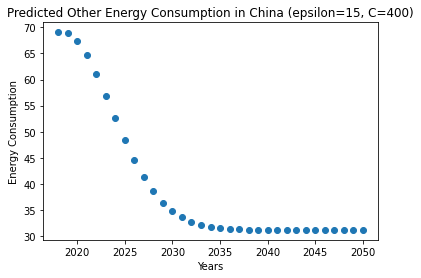

In [522]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Other Energy Consumption in China (epsilon=15, C=400)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Population

In [523]:
# Use MinMax Scaling on Year and Population
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Population (scaled)']=scaler.fit_transform(df[['Population']])

In [524]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Population'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Population in China", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [525]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Population'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='linear', C=1000000000, epsilon=20000000) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [526]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Population'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+20000000, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-20000000, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Population in China (epsilon=20000000, C=1000000000)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [527]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([1.233899e+09, 1.382581e+09, 1.338851e+09, 1.260137e+09,
       1.198915e+09, 1.251391e+09, 1.373835e+09, 1.347597e+09,
       1.207661e+09])

In [528]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 96.80
Mean Squared Error is:  152963265883706.72
Root Mean Squared Error is:  12367831.899072153


In [529]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.233899e+09,1252735000
1,1.382581e+09,1378665000
2,1.338851e+09,1344130000
3,1.260137e+09,1280400000
4,1.198915e+09,1204855000
5,1.251391e+09,1271850000
6,1.373835e+09,1371220000
7,1.347597e+09,1350695000
8,1.207661e+09,1217550000


In [530]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([1.23837132e+09, 1.39515379e+09, 1.34904130e+09, 1.26603882e+09,
       1.20148133e+09, 1.25681632e+09, 1.38593129e+09, 1.35826380e+09,
       1.21070383e+09])

In [531]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 97.57
Mean Squared Error is:  140725805877053.33
Root Mean Squared Error is:  11862790.81317096


In [532]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.238371e+09,1252735000
1,1.395154e+09,1378665000
2,1.349041e+09,1344130000
3,1.266039e+09,1280400000
4,1.201481e+09,1204855000
5,1.256816e+09,1271850000
6,1.385931e+09,1371220000
7,1.358264e+09,1350695000
8,1.210704e+09,1217550000


In [533]:
model2 = SVR(kernel='linear', C=1000000000, epsilon=20000000) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([1.40124136e+09, 1.41002909e+09, 1.41881682e+09, 1.42760455e+09,
       1.43639227e+09, 1.44518000e+09, 1.45396773e+09, 1.46275545e+09,
       1.47154318e+09, 1.48033091e+09, 1.48911864e+09, 1.49790636e+09,
       1.50669409e+09, 1.51548182e+09, 1.52426955e+09, 1.53305727e+09,
       1.54184500e+09, 1.55063273e+09, 1.55942045e+09, 1.56820818e+09,
       1.57699591e+09, 1.58578364e+09, 1.59457136e+09, 1.60335909e+09,
       1.61214682e+09, 1.62093455e+09, 1.62972227e+09, 1.63851000e+09,
       1.64729773e+09, 1.65608545e+09, 1.66487318e+09, 1.67366091e+09,
       1.68244864e+09])

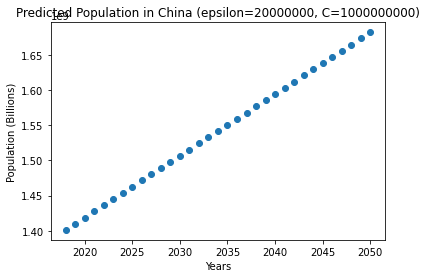

In [534]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Population in China (epsilon=20000000, C=1000000000)')
ax.set_xlabel('Years')
ax.set_ylabel('Population (Billions)')


plt.show()

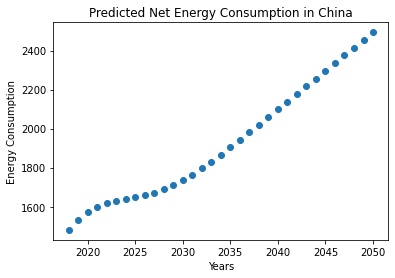

In [535]:
fig, ax = plt.subplots()
ax.scatter(years,net_consumption)
ax.set_title('Predicted Net Energy Consumption in China')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

In [542]:
corr, _ = pearsonr(net_consumption, y_pred)
print('Pearsons correlation for Net Energy Consumption with Population in predicted values: %.3f' % corr)

Pearsons correlation for Net Energy Consumption with Population in predicted values: 0.986


In [543]:
# Finding the Rate of Increase for other renewables Consumption
print ("Rate of Increase:", (net_consumption[32] - net_consumption[22])/10)

Rate of Increase: 39.49609441743728
